In [9]:
# import required packages and libraries.

import os
import cv2
import time
import random
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tqdm import tqdm
from PIL import Image

# path tp the images dataset.
dataset_path = "./image_dataset/"


# Labels used for the daataset accordingly.
label_names = ["Dog", "Cat", "Car", "Unknown"]
# label_names = ["Car", "Unknown"]

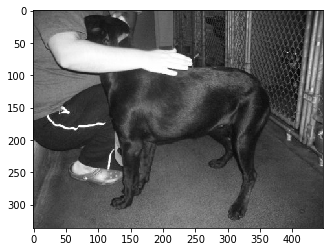

(336, 448)


In [10]:
# read the image and display
for label in label_names:
    images_path = os.path.join(dataset_path, label)
    for clas in os.listdir(images_path):
        image = cv2.imread(os.path.join(
            images_path, clas), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.show()
        break
    break

print(image.shape)

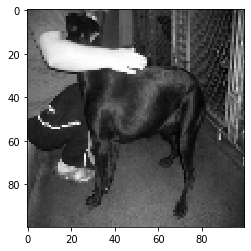

In [11]:
image_size = 100
resized_image = cv2.resize(image, (image_size, image_size))
plt.imshow(resized_image, cmap='gray')
plt.show()

In [12]:
# create the training data to feed to train the model
training_data = []

def create_training_data():
    for label in label_names:
        images_path = os.path.join(dataset_path, label)
        label_index = label_names.index(label)
        
        for clas in tqdm(os.listdir(images_path)):
            try:
                cv_image = cv2.imread(os.path.join(
                    images_path, clas), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(cv_image, (image_size, image_size))
                training_data.append([resized_image, label_index])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 12501/12501 [07:03<00:00, 29.52it/s] 


In [13]:
#total size of the training dataset(equal to sum of all the images)
print(len(training_data))

49948


In [14]:
random.shuffle(training_data)

In [15]:
x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)


x_train = np.array(x_train).reshape(-1, image_size, image_size, 1)

In [16]:
write_x_train = open("x_train.pickle", "wb")
pickle.dump(x_train, write_x_train)
write_x_train.close()

write_y_train = open("y_train.pickle", "wb")
pickle.dump(y_train, write_y_train)
write_y_train.close()
